In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, random_state=20)

### 교차 검증!

In [25]:
def RandTree_grid_search(X, y, kfolds=5):
  rf_params = {
      'n_estimators':[50, 80, 100],
      'max_depth':[3, 5, 7, 9],
      'min_samples_leaf':[1,3,5,8],
      'max_features':[2,3,4]
  }
  dtmodel = RandomForestClassifier()
  
  # 교차 검증
  dt_gscv = GridSearchCV(dtmodel, rf_params, cv=kfolds)
  dt_gscv.fit(X, y)
  return dt_gscv.best_params_, dt_gscv.best_score_

In [26]:
bparam = RandTree_grid_search(X_train, y_train, 3)

In [27]:
print('최적화: ', bparam[0])
print('예측 성능: ', bparam[1])

최적화:  {'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 1, 'n_estimators': 80}
예측 성능:  0.980952380952381


# 적용

In [28]:
# 최대 뎁스, 최대 사용 cpu수 -1
model = RandomForestClassifier(max_depth = 3,max_features=2, min_samples_leaf=1,
                               n_estimators=80, n_jobs=-1)

In [33]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('정확도:',accuracy_score(y_test, y_pred))
print('R2 score:', model.score(X_test,y_test))
print('R2 score:', model.score(X_train,y_train))


정확도: 0.8888888888888888
R2 score: 0.8888888888888888
R2 score: 0.9904761904761905


In [23]:
feature_imp = pd.Series(model.feature_importances_, index=iris.feature_names).sort_values(ascending=False)

In [19]:
import seaborn as sns

Text(0, 0.5, 'Features')

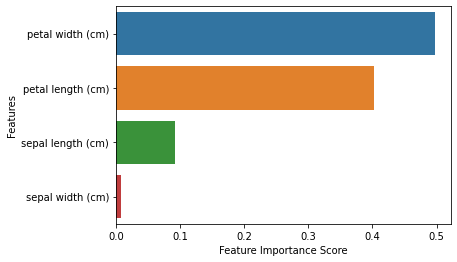

In [24]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')